In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
com.columns

Index(['operateur', 'annee', 'filiere', 'consoa', 'pdla',
       'nombre_maille_secretisees_a', 'indquala', 'consoi', 'pdli',
       'nombre_maille_secretisees_i', 'indquali', 'consot', 'pdlt',
       'nombre_maille_secretisees_t', 'indqualt', 'consor', 'pdlr',
       'nombre_maille_secretisees_r', 'indqualr', 'thermor', 'partr',
       'consona', 'pdlna', 'nombre_maille_secretisees_na', 'indqualna',
       'code_commune', 'libelle_commune', 'code_epci', 'libelle_epci',
       'code_departement', 'libelle_departement', 'code_region',
       'libelle_region', 'id_filiere', 'consototale', 'code_postal'],
      dtype='object')

In [7]:
reg = pd.read_csv('conso-elec-gaz-region.csv', sep=';')
dep = pd.read_csv('conso-elec-gaz-departement.csv', sep=';')
com = pd.read_csv('conso-elec-gaz-commune.csv', sep=';')

/tmp/ipykernel_277912/733422901.py:3: DtypeWarning: Columns (25,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  com = pd.read_csv('conso-elec-gaz-commune.csv', sep=';')


In [5]:
def super_data():
    #importé les CSV
    reg = pd.read_csv('conso-elec-gaz-region.csv', sep=';')
    dep = pd.read_csv('conso-elec-gaz-departement.csv', sep=';')
    com = pd.read_csv('conso-elec-gaz-commune.csv', sep=';')

    #faire en sorte d'avoir les meme valeur pour opérateur dans les 3 table
    reg.operateur = reg.operateur.replace("Régie d'électricité de Montvalezan-la-Rosière", "Régie d’électricité de Montvalezan-La-Rosière")

    #faire en sorte d'avoir les meme type pour code régions dans les 3 table
    reg = reg[reg['code_region'] != 'Fr']
    reg = reg[reg['code_region'] != 'XX']
    reg.code_region = reg.code_region.astype(int)

    #print(np.sort(reg.code_region.unique()))
    #print(np.sort(dep.code_region.unique()))

    #Avoir le meme ype de code département dans les 2 talbe
    lst_to_drop = [i for i in com.code_departement.unique() if i not in dep.code_departement.unique()]
    com = com[~com.code_departement.isin(lst_to_drop)]

    com = com[~com.code_departement.str.contains('[a-zA-Z]', regex=True)]
    dep = dep[~dep.code_departement.str.contains('[a-zA-Z]', regex=True)]

    com.code_departement = com.code_departement.astype(int)
    dep.code_departement = dep.code_departement.astype(int)

    #print(np.sort(com.code_departement.unique()))
    #print(np.sort(dep.code_departement.unique()))

    return reg, dep, com

super_data()

/tmp/ipykernel_277912/1092911276.py:5: DtypeWarning: Columns (25,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  com = pd.read_csv('conso-elec-gaz-commune.csv', sep=';')


[ 1  2  3  4  6 11 24 27 28 32 44 52 53 75 76 84 93 94]
[ 1  2  3  4  6 11 24 27 28 32 44 52 53 75 76 84 93 94]
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95 971 972 973 974 976]
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95 971 972 973 974 976]


(                                               operateur  annee      filiere  \
 0      Régie intercommunale d'électricité de Niederbr...   2021  Electricité   
 1                        Régie Municipale Bazas-Energies   2021  Electricité   
 2               Régie municipale d'électricité d'Arignac   2021  Electricité   
 3               Régie municipale d'électricité d'Arignac   2021  Electricité   
 4               Régie municipale d'électricité d'Arignac   2021  Electricité   
 ...                                                  ...    ...          ...   
 18123                                               GRDF   2020          Gaz   
 18124                                               GRDF   2020          Gaz   
 18125                                               GRDF   2020          Gaz   
 18126                                               GRDF   2020          Gaz   
 18127                                               GRDF   2020          Gaz   
 
       code_categorie_cons

In [71]:
def super_data():
    #importé les CSV
    reg = pd.read_csv('conso-elec-gaz-region.csv', sep=';')
    dep = pd.read_csv('conso-elec-gaz-departement.csv', sep=';')
    com = pd.read_csv('conso-elec-gaz-commune.csv', sep=';')

    #faire en sorte d'avoir les meme valeur pour opérateur dans les 3 table
    reg.operateur = reg.operateur.replace("Régie d'électricité de Montvalezan-la-Rosière", "Régie d’électricité de Montvalezan-La-Rosière")

    #faire en sorte d'avoir les meme type pour code régions dans les 3 table
    reg = reg[reg['code_region'] != 'Fr']
    reg = reg[reg['code_region'] != 'XX']
    reg.code_region = reg.code_region.astype(int)

    #Avoir le meme ype de code département dans les 2 talbe
    com.code_departement = com.code_departement.astype(str)
    dep.code_departement = dep.code_departement.astype(str)

    com = com[~com.code_departement.str.contains('[a-zA-Z]', regex=True)]
    dep = dep[~dep.code_departement.str.contains('[a-zA-Z]', regex=True)]

    lst_to_drop = [i for i in com.code_departement.unique() if i not in dep.code_departement.unique()]
    com = com[~com.code_departement.isin(lst_to_drop)]

    lst_to_drop = [i for i in dep.code_departement.unique() if i not in com.code_departement.unique()]
    dep = dep[~com.code_departement.isin(lst_to_drop)]

    com.code_departement = com.code_departement.astype(int)
    dep.code_departement = dep.code_departement.astype(int)

    return reg, dep, com

super_data()

In [72]:
reg, dep, com = super_data()

#test super data
if reg.code_region.unique().sort() == dep.code_region.unique().sort():
    print('colone regions verifié')
if com.code_departement.unique() == dep.code_departement.unique():
    print('colone departement verifié')
if com.code_departement.dtypes and dep.code_departement.dtypes == 'int64':
    print('type colone departement verifié')



/tmp/ipykernel_259370/2719332915.py:5: DtypeWarning: Columns (25,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  com = pd.read_csv('conso-elec-gaz-commune.csv', sep=';')
/tmp/ipykernel_259370/2719332915.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dep = dep[~com.code_departement.isin(lst_to_drop)]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [13]:
com.code_commune

0         65105
1         65107
2         65109
3         65111
4         65114
          ...  
501560    72322
501561    72325
501562    72330
501563    72336
501564    72338
Name: code_commune, Length: 501565, dtype: object

In [46]:
len(reg.operateur.unique()), len(dep.operateur.unique()), len(com.operateur.unique())

(181, 181, 181)

In [28]:
reg.code_region.dtypes, dep.code_region.dtypes, com.code_region.dtypes

(dtype('O'), dtype('int64'), dtype('int64'))

In [50]:
dep.code_departement.unique()

array(['02', '03', '04', '05', '10', '11', '13', '14', '15', '16', '22',
       '23', '24', '27', '32', '38', '40', '41', '42', '46', '48', '55',
       '61', '62', '63', '64', '65', '67', '69', '71', '73', '82', '83',
       '85', '87', '34', '54', '06', '59', '09', '31', '68', '80', '08',
       '21', '25', '26', '44', '52', '56', '72', '76', '77', '81', '84',
       '86', '89', '90', '91', '92', '28', '29', '30', '50', '57', '70',
       '75', '93', '12', '33', '66', '2A', '19', '35', '45', '47', '49',
       '79', '01', '07', '18', '36', '37', '51', '94', '95', '17', '43',
       '53', '60', '88', '78', '74', '39', '58', '971', '973', '972',
       '976', '2B', '974'], dtype=object)

In [51]:
com.code_departement.unique()

array([65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
       82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 40, 16, 17,
       38, 54, 9, 33, 59, 57, 31, 34, 26, 1, 2, 3, 4, 6, 7, 8, 10, 11, 13,
       18, 19, 21, 24, 25, 27, 28, 29, 30, 35, 36, 37, 39, 41, 42, 44, 46,
       47, 48, 49, 50, 51, 53, 55, 56, 58, 60, 62, 63, 64, 52, 14, 15, 22,
       23, 32, 43, 45, 61, '57', '58', '59', '76', '77', '78', '79', '80',
       '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91',
       '92', '93', '94', '95', '74', '65', '67', '17', '49', '34', '38',
       '68', '06', '33', '66', '09', '11', '26', '01', '03', '04', '07',
       '12', '13', '14', '15', '16', '18', '19', '21', '23', '25', '27',
       '29', '30', '31', '35', '36', '37', '39', '40', '41', '42', '44',
       '45', '46', '47', '48', '50', '51', '52', '54', '55', '60', '61',
       '62', '63', '64', '69', '70', '71', '72', '73', '02', '10', '28',
       '05', '08', '22', '24', '75', '4

In [53]:
lst_to_drop = []
for i in com.code_departement.unique():
    if i not in dep.code_departement.unique():
        lst_to_drop.append(i)

lst_to_drop

[65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 40,
 16,
 17,
 38,
 54,
 9,
 33,
 59,
 57,
 31,
 34,
 26,
 1,
 2,
 3,
 4,
 6,
 7,
 8,
 10,
 11,
 13,
 18,
 19,
 21,
 24,
 25,
 27,
 28,
 29,
 30,
 35,
 36,
 37,
 39,
 41,
 42,
 44,
 46,
 47,
 48,
 49,
 50,
 51,
 53,
 55,
 56,
 58,
 60,
 62,
 63,
 64,
 52,
 14,
 15,
 22,
 23,
 32,
 43,
 45,
 61,
 5,
 12]

In [54]:
lst_to_drop = [i for i in com.code_departement.unique() if i not in dep.code_departement.unique()]
com = com[~com.code_departement.isin(lst_to_drop)]

In [57]:
a = com.code_departement.unique() 
b = dep.code_departement.unique()

a.sort()
b.sort()

a == b

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [41]:
def count_values(df, colums, value):
    return df[colums].value_counts()[value]

def pourcentage_valeur_serie(df, colums):
    return df[colums].value_counts(normalize=True)*100

def print_row_with_value(df, col, value):
    rows_with_value = df[df[col] == value]
    print(f"Lignes contenant '{value}' dans '{col}':")
    print(rows_with_value)

#count_values(reg, 'code_region', 'XX') #en tout il y a 18128 valeur 
pourcentage_valeur_serie(reg, 'code_region')

code_region
44    15.881509
84    12.941306
76    11.893204
75     9.995587
32     8.004192
24     6.387908
11     5.417034
93     4.843336
27     4.810238
28     4.545455
52     4.413063
53     4.032436
04     1.345984
01     1.301853
02     1.279788
94     1.246690
03     1.147396
Fr     0.204104
06     0.198588
XX     0.110327
Name: proportion, dtype: float64

In [42]:
print_row_with_value(reg, 'code_region', 'XX')

Lignes contenant 'XX' dans 'code_region':
      operateur  annee      filiere code_categorie_consommation  \
4827     Enedis   2021  Electricité                         ENT   
4828     Enedis   2021  Electricité                         ENT   
4829     Enedis   2021  Electricité                         PRO   
4830     Enedis   2021  Electricité                         PRO   
4831     Enedis   2021  Electricité                         RES   
5012     Enedis   2020  Electricité                         ENT   
5013     Enedis   2020  Electricité                         ENT   
5014     Enedis   2020  Electricité                         ENT   
5015     Enedis   2020  Electricité                         PRO   
10954    Enedis   2020  Electricité                         ENT   
10955    Enedis   2020  Electricité                         ENT   
10956    Enedis   2020  Electricité                         RES   
13253    Enedis   2021  Electricité                         ENT   
13254    Enedis   20

In [30]:
dep.code_region.unique()

array([32, 84, 93, 44, 76, 28, 75, 53, 24, 27, 52, 11, 94,  1,  3,  2,  6,
        4])

In [23]:
a = reg.operateur.unique().tolist()
b = dep.operateur.unique().tolist()
c = com.operateur.unique().tolist()

a.sort()
b.sort()
c.sort()

#comparer le contenue des listes
b == a

True

In [22]:
#creer une fonction qui prend en entré de liste et qui affiche les valeur qu'elle n'on pas en commun
def diff(list1, list2):
    for i in list1:
        if i not in list2:
            print(i)

diff(a, b)

Régie d'électricité de Montvalezan-la-Rosière


In [21]:
diff(b, a)

Régie d’électricité de Montvalezan-La-Rosière


In [20]:
#remplacer dans le df reg dans la colone opérateur 'Régie d'électricité de Montvalezan-la-Rosière' par 'Régie d'électricité de Montvalezan-La-Rosière'
reg.operateur = reg.operateur.replace("Régie d'électricité de Montvalezan-la-Rosière", "Régie d’électricité de Montvalezan-La-Rosière")

In [44]:
diff(reg.operateur.unique().tolist(), dep.operateur.unique().tolist())

In [25]:
reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18128 entries, 0 to 18127
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   operateur                       18128 non-null  object 
 1   annee                           18128 non-null  int64  
 2   filiere                         18128 non-null  object 
 3   code_categorie_consommation     18128 non-null  object 
 4   libelle_categorie_consommation  18128 non-null  object 
 5   code_grand_secteur              18128 non-null  object 
 6   libelle_grand_secteur           18128 non-null  object 
 7   code_naf                        11143 non-null  float64
 8   libelle_secteur_naf2            18128 non-null  object 
 9   conso                           18128 non-null  float64
 10  pdl                             18128 non-null  int64  
 11  indqual                         18128 non-null  float64
 12  nombre_mailles_secretisees      

In [45]:
dep.columns

Index(['operateur', 'annee', 'filiere', 'consoa', 'pdla',
       'nombre_maille_secretisees_a', 'indquala', 'consoi', 'pdli',
       'nombre_maille_secretisees_i', 'indquali', 'consot', 'pdlt',
       'nombre_maille_secretisees_t', 'indqualt', 'consor', 'pdlr',
       'nombre_maille_secretisees_r', 'indqualr', 'consona', 'pdlna',
       'nombre_maille_secretisees_na', 'indqualna', 'code_departement',
       'libelle_departement', 'code_region', 'libelle_region', 'id_filiere',
       'geom', 'consototale'],
      dtype='object')

In [56]:
dep[['consoa','consoi','consot','consor']]

,consoa,consoi,consot,consor
0,26490.690,8.380107e+05,515742.320000,1472026.600
1,25747.900,4.263640e+05,430434.210000,1130822.230
2,13601.050,1.050746e+05,250012.200000,685956.960
3,6611.470,4.440466e+04,323814.050000,561238.840
4,33909.590,5.246808e+05,374681.450000,962384.810
...,...,...,...,...
5587,0.000,1.131921e+06,78138.980496,0.000
5588,0.000,4.762951e+05,67562.725554,0.000
5589,0.000,5.517510e+05,0.000000,0.000
5590,0.000,2.138815e+04,39792.563000,124693.503


In [54]:
dep.filiere.unique()

array(['Electricité', 'Gaz'], dtype=object)

In [48]:
dep[['pdla','pdli','pdlt','pdlr']]

,pdla,pdli,pdlt,pdlr
0,334,633,2069,259239
1,373,553,1813,219826
2,118,252,1323,131064
3,62,213,1984,123947
4,288,561,1551,169748
...,...,...,...,...
5587,0,19,4,0
5588,0,13,4,0
5589,0,8,0,0
5590,0,25,183,7975


IndexError: index 2 is out of bounds for axis 0 with size 2

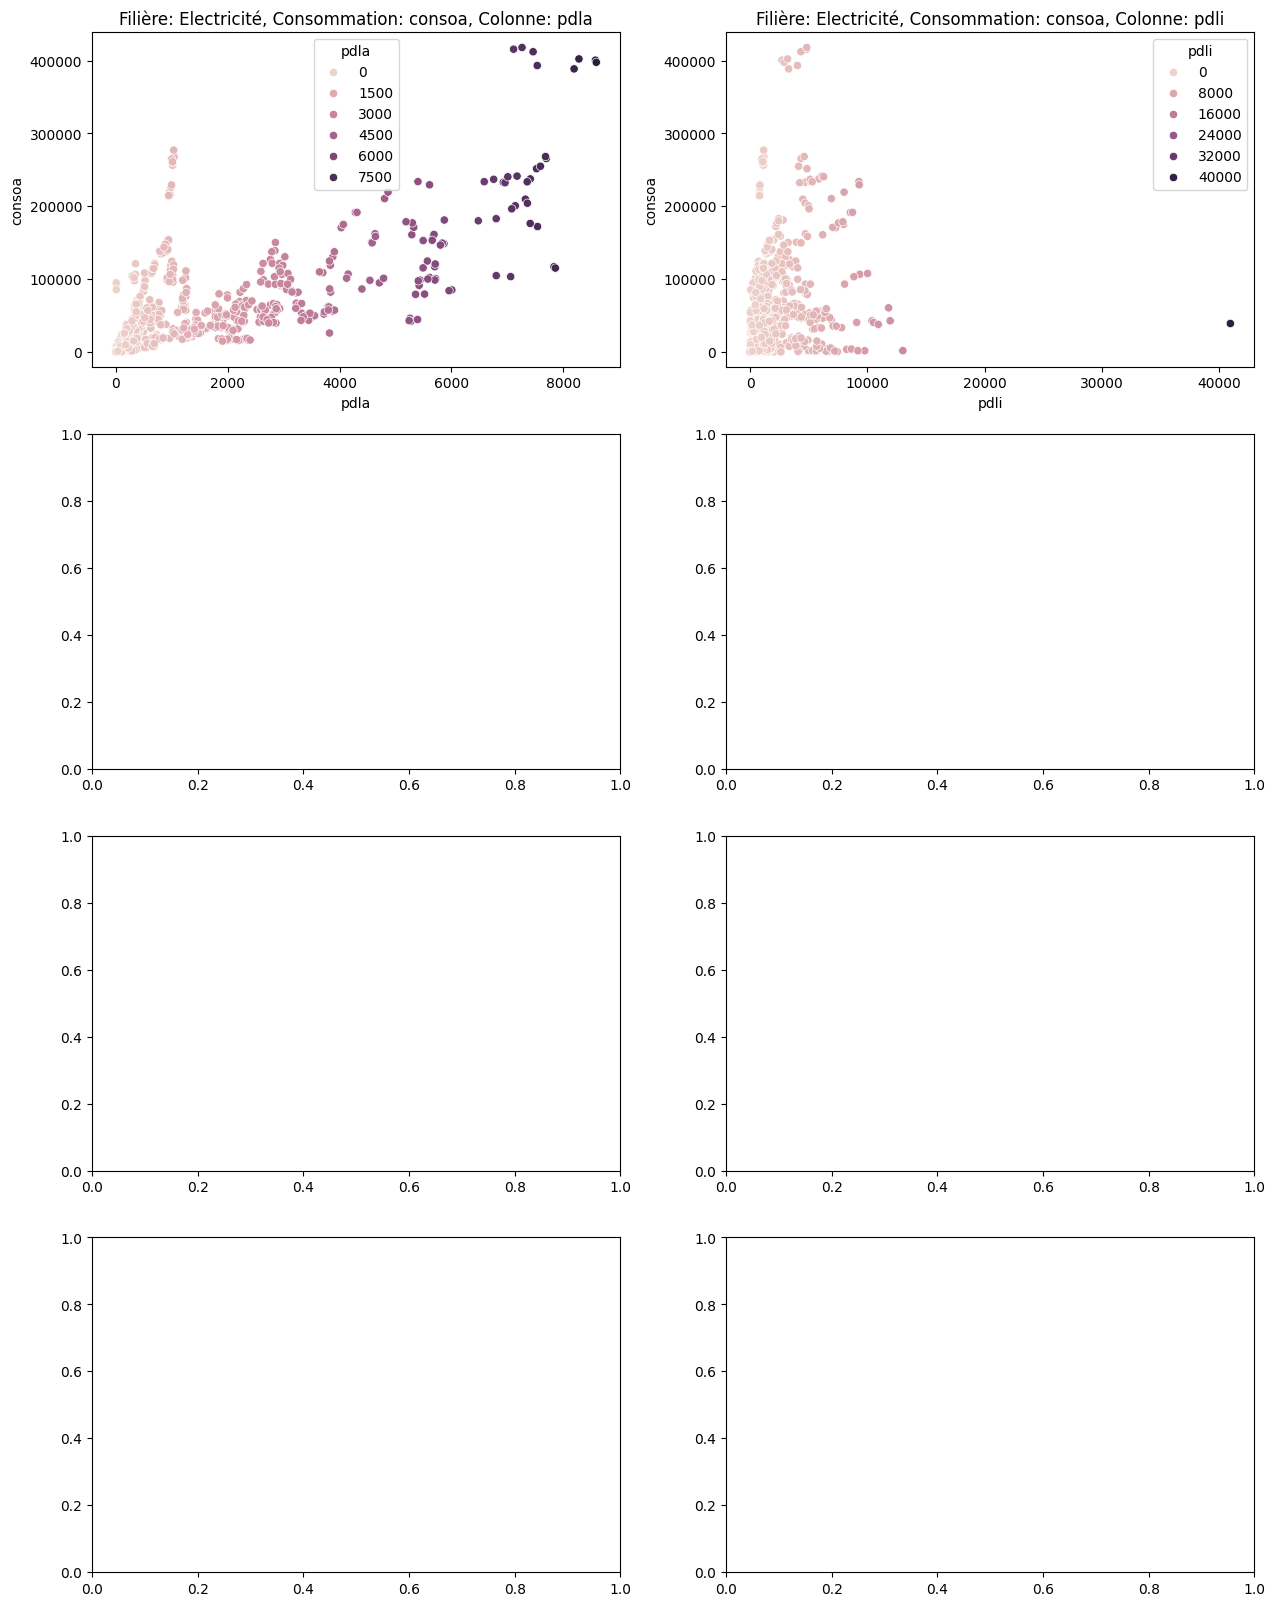

In [62]:
#creer deux scater plot cote a cote
fig, ax = plt.subplots(4, 2, figsize=(15, 20))

x_cols = ['pdla', 'pdli', 'pdlt', 'pdlr']
y_cols = ['consoa', 'consoi', 'consot', 'consor']

for i, filiere in enumerate(['Electricité', 'Gaz']):
    data = dep.loc[dep['filiere'] == filiere]
    for j, y_col in enumerate(y_cols):
        for k, x_col in enumerate(x_cols):
            sns.scatterplot(x=x_col, y=y_col, hue=x_col, data=data, ax=ax[j][k])
            ax[j][k].set_title(f'Filière: {filiere}, Consommation: {y_col}, Colonne: {x_col}')

plt.tight_layout()
plt.show()

In [ ]:
dep['plt_type'] = 

In [ ]:
dep_plot = dep[['conso', 'pdl','filiere']]
sns.pairplot(reg_plot, hue='filiere', corner=False)

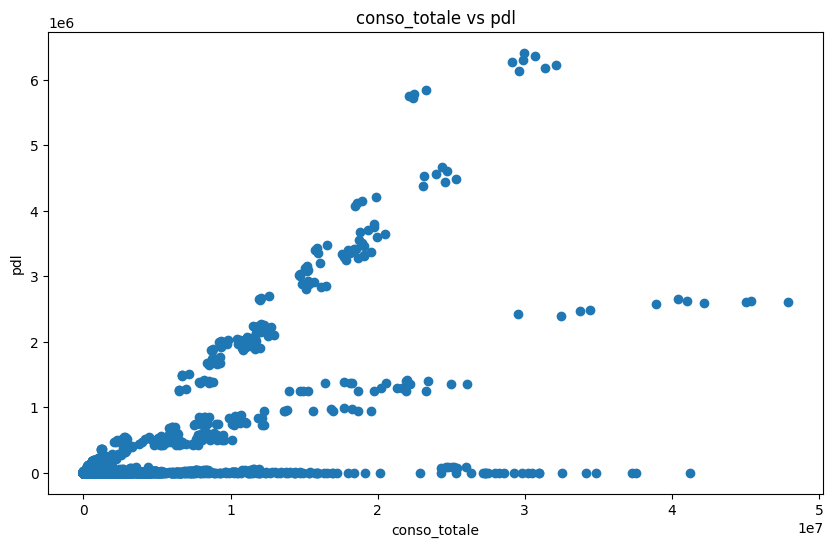

In [31]:
#correlation entre conso et pdl
plt.figure(figsize=(10, 6))
plt.scatter(reg['conso'], reg['pdl'])
plt.xlabel('conso_totale')
plt.ylabel('pdl')
plt.title('conso_totale vs pdl')
plt.show()

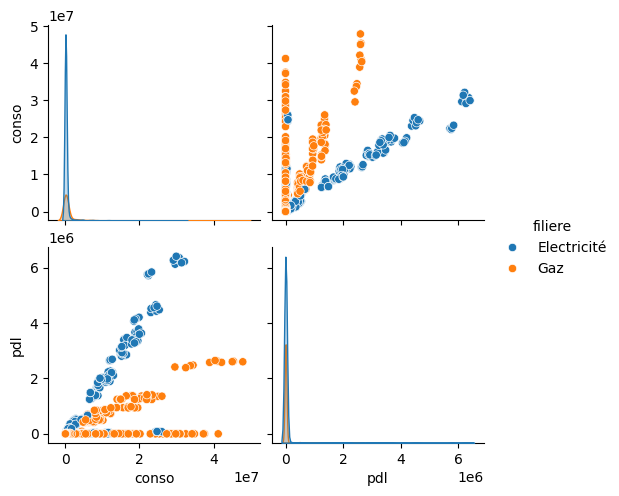

In [33]:
reg_plot = reg[['conso', 'pdl','filiere']]
sns.pairplot(reg_plot, hue='filiere', corner=False)

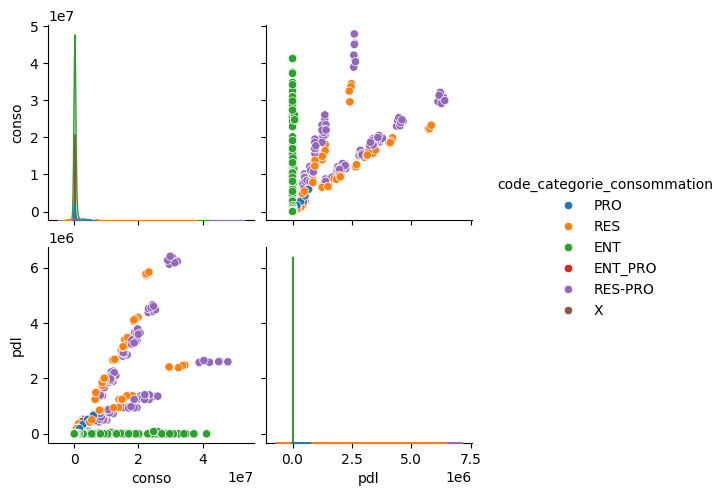

In [34]:
reg_plot = reg[['conso', 'pdl','code_categorie_consommation']]
sns.pairplot(reg_plot, hue='code_categorie_consommation', corner=False)

In [22]:
reg.columns

Index(['operateur', 'annee', 'filiere', 'code_categorie_consommation',
       'libelle_categorie_consommation', 'code_grand_secteur',
       'libelle_grand_secteur', 'code_naf', 'libelle_secteur_naf2', 'conso',
       'pdl', 'indqual', 'nombre_mailles_secretisees', 'code_region',
       'libelle_region'],
      dtype='object')

In [21]:
com.columns

Index(['operateur', 'annee', 'filiere', 'consoa', 'pdla',
       'nombre_maille_secretisees_a', 'indquala', 'consoi', 'pdli',
       'nombre_maille_secretisees_i', 'indquali', 'consot', 'pdlt',
       'nombre_maille_secretisees_t', 'indqualt', 'consor', 'pdlr',
       'nombre_maille_secretisees_r', 'indqualr', 'thermor', 'partr',
       'consona', 'pdlna', 'nombre_maille_secretisees_na', 'indqualna',
       'code_commune', 'libelle_commune', 'code_epci', 'libelle_epci',
       'code_departement', 'libelle_departement', 'code_region',
       'libelle_region', 'id_filiere', 'consototale', 'code_postal'],
      dtype='object')

In [6]:
dep.head()

,operateur,annee,filiere,consoa,pdla,nombre_maille_secretisees_a,indquala,consoi,pdli,nombre_maille_secretisees_i,...,pdlna,nombre_maille_secretisees_na,indqualna,code_departement,libelle_departement,code_region,libelle_region,id_filiere,geom,consototale
0,Enedis,2011,Electricité,26490.69,334,0,0.957,838010.71,633,0,...,44,0,0.568,02,Aisne,32,Hauts-de-France,100,NaN,2855280.66
1,Enedis,2011,Electricité,25747.90,373,0,0.976,426364.02,553,0,...,47,0,0.871,03,Allier,84,Auvergne-Rhône-Alpes,100,NaN,2017190.64
2,Enedis,2011,Electricité,13601.05,118,0,0.946,105074.61,252,0,...,31,0,0.574,04,Alpes-de-Haute-Provence,93,Provence-Alpes-Côte d'Azur,100,NaN,1055358.03
3,Enedis,2011,Electricité,6611.47,62,0,0.949,44404.66,213,0,...,44,0,0.320,05,Hautes-Alpes,93,Provence-Alpes-Côte d'Azur,100,NaN,937412.37
4,Enedis,2011,Electricité,33909.59,288,0,0.944,524680.83,561,0,...,35,0,0.461,10,Aube,44,Grand Est,100,NaN,1897584.71
